#Titanic Machine Learning from Disaster

### 1. Get data

#### 1.1 Load datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

train = pd.read_csv("classification/data/Titanic/train.csv")
test = pd.read_csv("classification/data/Titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.2 Look at the train data

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_id = test["PassengerId"]

### 2. Data clean and transform

#### 2.1 Label: Survived

In [5]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 2.2 Numerical features

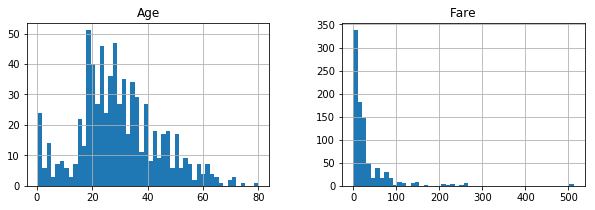

In [6]:
num_attr = ["Age", "Fare"]
train.hist(num_attr, bins=50, figsize=(10, 3))
plt.show()

In [7]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 2.3 Categorical features

In [10]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 2.3 Deal with missing values

In [12]:
from sklearn.preprocessing import Imputer

num_attr = ["Age", "Fare"]
imputer = Imputer(strategy="median")
train[num_attr] = imputer.fit_transform(train[num_attr])
test[num_attr] = imputer.fit_transform(test[num_attr])

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 2.4 Convert text into numerical or quantitative data

In [15]:
train_sex_encoded = train["Sex"].factorize()[0]
test_sex_encoded = test["Sex"].factorize()[0]
train["Sex"] = train_sex_encoded
test["Sex"] = test_sex_encoded

In [16]:
train_emb_encoded = train["Embarked"].factorize()[0]
test_emb_encoded = test["Embarked"].factorize()[0]
train["Embarked"] = train_emb_encoded
test["Embarked"] = test_emb_encoded

In [17]:
train["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [18]:
train["Embarked"].value_counts()

 0    644
 1    168
 2     77
-1      2
Name: Embarked, dtype: int64

#### 2.5 Detect and delete instances with unnomal values

In [19]:
def detect(data, features=("Embarked", "Fare")):
    indices = []
    indices.extend(data[data[features[0]] == -1].index)
    indices.extend(data[data[features[1]] >= 300].index)
    return indices


train.drop(train.index[detect(train)], inplace=True)
test.drop(test.index[detect(test)], inplace=True)

In [20]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    886 non-null int64
Survived       886 non-null int64
Pclass         886 non-null int64
Name           886 non-null object
Sex            886 non-null int64
Age            886 non-null float64
SibSp          886 non-null int64
Parch          886 non-null int64
Ticket         886 non-null object
Fare           886 non-null float64
Cabin          200 non-null object
Embarked       886 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 90.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null int64
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null ob

In [21]:
del train["PassengerId"]
del train["Name"]
del train["Ticket"]
del train["Cabin"]

### 3 Features visualization

In [22]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.544129
Fare        0.259188
Embarked    0.104818
Parch       0.083691
SibSp      -0.032095
Age        -0.072041
Pclass     -0.331075
Name: Survived, dtype: float64

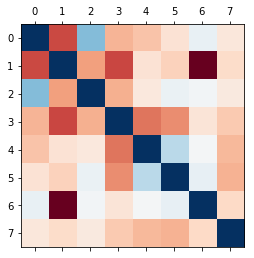

In [23]:
plt.matshow(corr_matrix, cmap="RdBu")
plt.show()

#### 3.1 Fare and Age

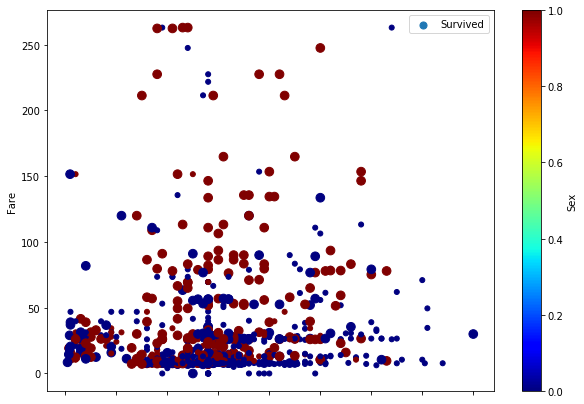

In [24]:
train.plot(kind="scatter", x="Age", y="Fare", c="Sex", cmap="jet", 
           figsize=(10, 7), label="Survived", s=(train["Survived"]+0.5)*50)
plt.legend()
plt.show()

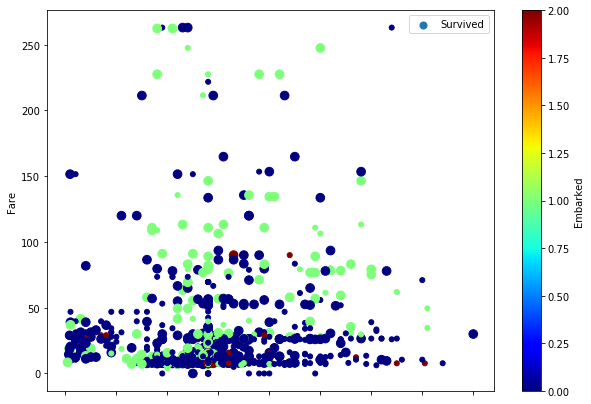

In [25]:
train.plot(kind="scatter", x="Age", y="Fare", c="Embarked", cmap="jet", 
           figsize=(10, 7), label="Survived", s=(train["Survived"]+0.5)*50)
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

train_scaled = train.copy()
train_num = train[num_attr]
train_scaled[num_attr] = StandardScaler(copy=True).fit_transform(train_num)

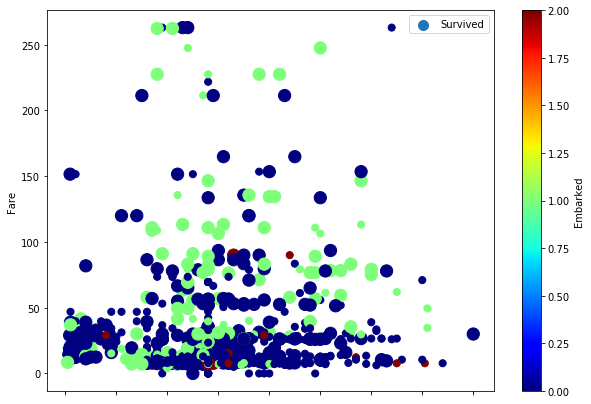

In [27]:
train.plot(kind="scatter", x="Age", y="Fare", c="Embarked", cmap="jet", 
           figsize=(10, 7), s=(train["Survived"]+0.5)*100, label="Survived")
plt.legend()
plt.show()

### 4 Classification Model

In [28]:
train_feature = train.drop("Survived", axis=1)
train_label = train["Survived"].copy()

#### 4.1 Logistic Regression

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=10)
log_reg.fit(train_feature, train_label)
scores = cross_val_score(log_reg, train_feature, train_label,
                         scoring="accuracy", cv=10)
scores

array([0.78651685, 0.79775281, 0.76404494, 0.83146067, 0.7752809 ,
       0.7752809 , 0.78651685, 0.77272727, 0.82954545, 0.81609195])

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

train_predict = cross_val_predict(log_reg, train_feature, train_label, cv=10, method="predict")
confusion_matrix(train_label, train_predict)

array([[471,  78],
       [105, 232]], dtype=int64)

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=10)
scores = cross_val_score(forest_clf, train_feature, train_label,
                         scoring="accuracy", cv=10)
scores

array([0.71910112, 0.84269663, 0.73033708, 0.80898876, 0.88764045,
       0.76404494, 0.85393258, 0.77272727, 0.86363636, 0.85057471])